In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

Problem 1) (10pts)  Using the notes as a model, study the effect of increasing $\epsilon$ for the equation 

$$
\dot{x} = x(1-x^{2}) + \epsilon \sin(t), ~ x(0) = \tilde{x}_{0}
$$

This work should include:

a) A regular perturbation approximation of the form $x(t) = x_{0}(t) + \epsilon x_{1}(t) + \mathcal{O}(\epsilon^{2})$.  Note, feel free to use a symbolic solver to find the integral necessary to compute $x_{1}(t)$.

b) Numerical simulations used to compare to your approximate solutions.

c) An exploration of different choices of the initial condition $\tilde{x}_{0}$ and how this impacts the long time limit of your solutions.

d) A rough idea of what value of $\epsilon$ causes your perturbation expansion to break down.  Provide justification through numerical simulation.  

**Answer to Problem 1:**

**a & b & c)** Using the regular perturbation approximation,$x(t) = x_{0} + \epsilon x_{1} + \mathcal{O}(\epsilon^{2})$, the ode can be written as:

$$
\dot{x} = (x_{0} + \epsilon x_{1} + \mathcal{O}(\epsilon^{2}))(1-(x_{0} + \epsilon x_{1} + \mathcal{O}(\epsilon^{2}))^{2}) + \epsilon \sin(t) \\
= (x_{0} + \epsilon x_{1} + \mathcal{O}(\epsilon^{2}))(1- x_{0}^{2} - 2\epsilon x_{1}x_{0} + \mathcal{O}(\epsilon^{2})) + \epsilon \sin(t)
$$

we throw higher order terms of $\epsilon$ as we are not looking at them,

$$
\dot{x} = x_{0} - x_{0}^{3} - 2\epsilon x_{1}x_{0}^{2} + \epsilon x_{1} - \epsilon x_{1}x_{0}^{2} + \epsilon \sin(t) + \mathcal{O}(\epsilon^{2}) \\
= \epsilon^{0}(x_{0} - x_{0}^{3}) + \epsilon^{1}(- 3x_{1}x_{0}^{2} +  x_{1} + \sin(t))+ \mathcal{O}(\epsilon^{2})
$$

which gives us:

$$
\dot{x}_{0} = x_{0} - x_{0}^{3}, \\
\dot{x}_{1} = - 3x_{1}x_{0}^{2} +  x_{1} + \sin(t) = x_{1}(1 - 3x_{0}^{2})+sin(t).
$$

First we solve $\dot{x}_{0} = x_{0} - x_{0}^{3}$ which is a separable ode:

$$
\frac{dx_{0}}{dt} = x_{0} - x_{0}^{3} \\
\Rightarrow \frac{1}{x_{0} - x_{0}^{3}}dx_{0} = dt \\
\Rightarrow \int \frac{1}{x_{0} - x_{0}^{3}}dx_{0} = \int dt
$$

which can be solved using partial fraction decomposition

$$
\int \frac{1}{x_{0}}dx_{0} - \frac{1}{2} \int \frac{1}{x_{0} + 1}dx_{0} - \frac{1}{2} \int \frac{1}{x_{0} - 1}dx_{0} = \int dt \\
\Rightarrow \ln \left| x_{0} \right| - \frac{1}{2} \ln \left| x_{0} + 1 \right| - \frac{1}{2} \ln \left| x_{0} - 1 \right| = t + c \\
\Rightarrow \ln \left| \frac{x_{0}}{\sqrt{x_{0} + 1}\sqrt{x_{0} - 1}} \right| = t+ c \\
\Rightarrow \frac{x_{0}}{\sqrt{x_{0} + 1}\sqrt{x_{0} - 1}} = c_{1}e^{t} \\
\Rightarrow \frac{x_{0}^{2}}{(x_{0}^{2} - 1)} = c_{2}e^{2t} \\
\Rightarrow x_{0}^{2} = c_{2}e^{2t}x_{0}^{2} - c_{2}e^{2t} \\
\Rightarrow x_{0} = \pm \sqrt{\frac{-c_{2}e^{2t}}{1-c_{2}e^{2t}}}.
$$

Then, using the initial condition $x_{0}(0) = \tilde{x}_{0}$ which only affects $x_{0}$, we simplify to:

$$
x_{0} = \frac{\tilde{x}_{0}e^{t}}{\sqrt{ 1-\tilde{x}_{0}^{2}  + \tilde{x}_{0}^{2}e^{2t}}}.
$$

From here we solve for:

$$
\dot{x}_{1} = x_{1}(1 - 3x_{0}^{2})+\sin(t) \\
\Rightarrow \dot{x}_{1} + x_{1}(-1 + 3x_{0}^{2})= \sin(t) \\
\Rightarrow \dot{x}_{1} + \left(-1 + \frac{3\tilde{x}^{2}_{0}e^{2t}}{1-\tilde{x}_{0}^{2}+ \tilde{x}_{0}^{2}e^{2t}}\right)x_{1}= \sin(t)
$$

Thus our integrating factor $G(t) = e^{\int^{t}p(s)ds}$ is given by
$$
G(t) = e^{-t}\left(1-\tilde{x}_{0}^{2} + \tilde{x}_{0}^{2}e^{2t}\right)^{3/2}
$$

$$
x_{1}(t) = \frac{1}{G(t)}\int_{0}^{t} \sin(s) G(s)ds.
$$

Then, using numerical quadtrature so deal with this beast, we can get an analytic approximation to our ODE.  

In [4]:
def f(x,t,ep):
    return x*(1.-x**2) + ep*np.sin(t)

def rk4(f,xj,tj,dt,ep):
    k1 = f(xj,tj,ep)
    k2 = f(xj+dt*0.5*k1,tj+dt*0.5,ep)
    k3 = f(xj+dt*0.5*k2,tj+dt*0.5,ep)
    k4 = f(xj+dt*k3,tj+dt,ep)
    return xj + dt/6.*(k1 + 2.*k2 + 2.*k3 + k4)

def a_sol(tvals,dt,x0,ep):
    
    et = np.exp(tvals)
    x0a = x0*et/np.sqrt( 1. - x0**2. + (x0*et)**2.)
    
    gti = et/( 1. - x0**2. + (x0*et)**2.)**(1.5)
    
    x1ker = np.sin(tvals)*(( 1. - x0**2. + (x0*et)**2.)**(1.5))/et
    Nvals = tvals.size
    x1 = np.zeros(Nvals)
    
    for jj in xrange(1,Nvals):
        x1[jj] = x1[jj-1] + dt/2*(x1ker[jj-1] + x1ker[jj])
    
    return x0a + ep*gti*x1

def ode_solver(f,x0,tf,dt,ep):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    sol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt,ep)
        tvals[jj] = tj+dt
    asol = a_sol(tvals,dt,x0,ep)
    plt.plot(tvals,sol,color='k',ls='-', label = 'Numerical')
    plt.plot(tvals,asol, color='r',ls='--', label = 'Analytical')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc=(.7,.7))
    #return [[tvals],[sol],[asol]]

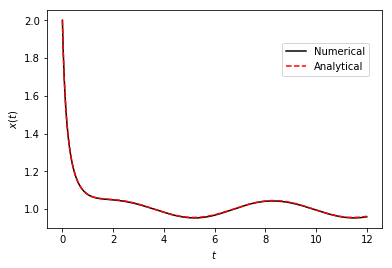

In [5]:
ode_solver(f,2,12,1e-3,0.1)

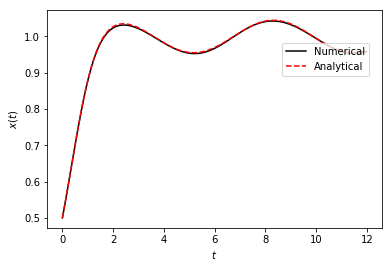

In [6]:
ode_solver(f,.5,12,1e-3,.1)

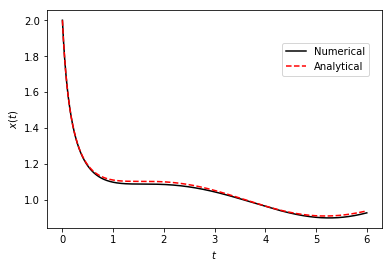

In [51]:
ode_solver(f,2,6,1e-3,.2)

**d)**   Below we can see more plots with initial condition 5 (which was the one that both analytical and numerical approximations were more alike) but with varying values of epsilon. We can see than anything above $\epsilon \approx .1$ results in large differences between the approximate solution and the numerical solution. 

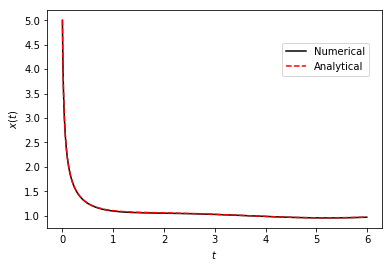

In [52]:
ode_solver(f,5,6,1e-2,.1)

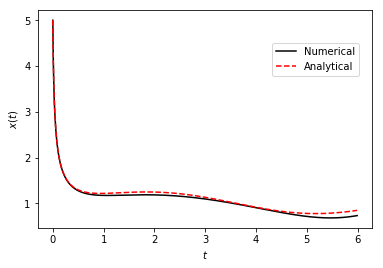

In [53]:
ode_solver(f,5,6,1e-2,0.5)

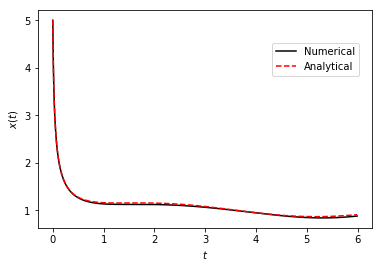

In [54]:
ode_solver(f,5,6,1e-2,0.3)

** Coments **: I don't see how the leading order solution can be correct as written.  8/10

Problem 2) (3pts each) 3.1.2, 3.2.2

**Answer to 3.1.2**
We have

$$
\dot{x} = r - \cosh(x)
$$

to find the fixed points we solve for 

$$
r - \cosh(x_{*}) = 0 \\
\cosh(x_{*}) = r \\
x_{*} = \cosh^{-1}(r)
$$

due to the symmetry of the function we also have the fixed point $x_{*} = -\cosh^{-1}(r)$. First we test the stability of the fixed points with the derivative test

$$
f_{x} = -\sinh(x) \Rightarrow f_{x}(\cosh^{-1}(r),r) = -\sinh(\cosh^{-1}(r))
$$

Using $\sinh$ identity $f_{x}(\cosh^{-1}(r),r) = -\sinh(\cosh^{-1}(r)) = -\sqrt{r^{2} - 1}$. This ensures that as long as $r>1$, then the fixed point $x_{*} = \cosh^{-1}(r)$ will always be stable. If we check for the other fixed point $f_{x}(-\cosh^{-1}(r),r) = \sinh(\cosh^{-1}(r)) = \sqrt{r^{2} - 1}$ which ensures that the fixed point $x_{*} = -arccosh(r)$ will always be unstable as long as $r>1$.

To find the critical value of $r$ where the bifurcation occurs we need $f_{x}(\cosh^{-1}(r),r) = -\sqrt{r^{2} - 1} = 0$ which happens when $r = \pm 1$. $r = -1$ is not possible since the arccosh function does not exist for negative values. So, that leaves $r_{c} = 1$ as our only critical value where the bifurcation can occur. 

We test

$$
f_{xx}(\cosh^{-1}(1),1) = -\cosh(\cosh^{-1}(r_{c})) = -1 \neq 0
$$

and 

$$
f_{r}(\cosh^{-1}(1),1) = r \neq 0
$$

So, we have a saddle node bifurcation where fixed points are created after $r>1$. The plots below show phase diagrams for three different values of r (after, at, and before $r=1$) and a bifurcation diagram.  


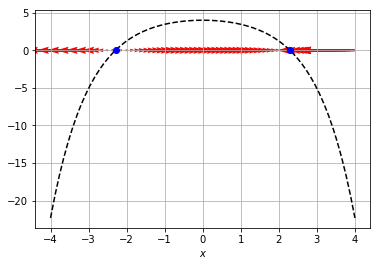

In [74]:
r = 5
xc = np.arccosh(r)
xvals = np.linspace(-4,4,70)
yvals = np.zeros(xvals.size)
xprime = r - np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r - np.cosh(xvals),ls='--',color='k')
plt.plot(xc,0,'bo',-xc,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

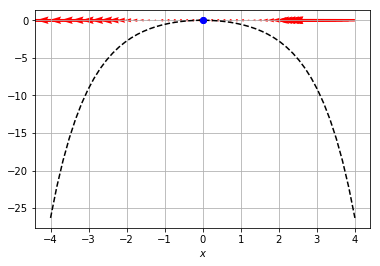

In [73]:
r = 1
xc = np.arccosh(r)
xvals = np.linspace(-4,4,50)
yvals = np.zeros(xvals.size)
xprime = r - np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r - np.cosh(xvals),ls='--',color='k')
plt.plot(xc,0,'bo',-xc,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

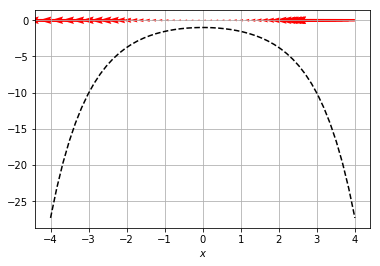

In [72]:
r = 0
xc = np.arccosh(r)
xvals = np.linspace(-4,4,50)
yvals = np.zeros(xvals.size)
xprime = r - np.cosh(xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,r - np.cosh(xvals),ls='--',color='k')
plt.plot(xc,0,'bo',-xc,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

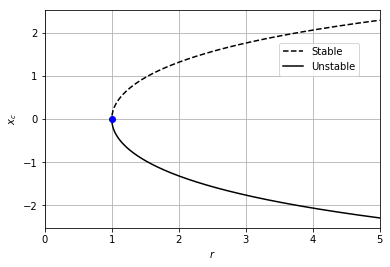

In [16]:
r = np.linspace(0,5,300)
xcp = np.arccosh(r)
xcm = -np.arccosh(r)

plt.plot(r,xcp,color = 'k', ls = '--', label = 'Stable')
plt.plot(r,xcm,color = 'k', ls = '-', label = 'Unstable')
plt.plot(1,0,'bo')
plt.xlabel('$r$')
plt.ylabel('$x_{c}$')
plt.xlim(0,5)
plt.legend(loc=(.7,.7))
plt.grid()
plt.show()

**Answer to 3.2.2**

We have 

$$
\dot{x} = rx - \ln(1+x)
$$

where we can see that at $x_{*} = 0$, $\dot{x}(0) = 0$. So we have one of our fixed points. To test when this fixed point undergoes a stability change we look at 

$$
f_{x} = r - \frac{1}{1+x} \Rightarrow f_{x}(0,r) = r - 1.
$$

So, a birfucation can only occur when $r_{c}=1$. We test what kind of bifurcation we have by

$$
f_{xx} = \frac{1}{(1+x)^{2}} \Rightarrow f_{xx}(0,1) = 1 \neq 0 \\
f_{r} = x \rightarrow f_{r}(0,1) = 0
$$

which means that the fixed point undergoes a transcritical bifurcation at $r_{c}=1$.

To find the other fixed point for small x, we will taylor expand $\ln(1+x)$ around $x = 0$:

$$
\dot{x} = rx - \ln(1+x) = rx - \left( x - \frac{1}{2}x^{2} + \mathcal{O}(x^{3}) \right) \\
= (r-1)x + \frac{1}{2}x^{2} + \mathcal{O}(x^{3}).
$$

This gives us the approximation for small x:

$$
\dot{x} \approx (r-1)x + \frac{1}{2}x^{2}
$$

we solve for  

$$
(r-1)x_{*} + \frac{1}{2}x_{*}^{2} = 0
$$

which gives us the local fixed point $x_{*} = 0, (2-2r)$. If we test stability using the derivative test, the fixed point $x_{*} = 0$ is stable when $r<1$ and unstable when $r>1$. The fixed point $x_{*} = 2-2r$ is unstable when $r<1$ and stable when $r>1$. 

Below are graphs showing phase diagrams for different values of r (below, after, and at $r=1$) and a bifurcation diagram for both fixed points. 

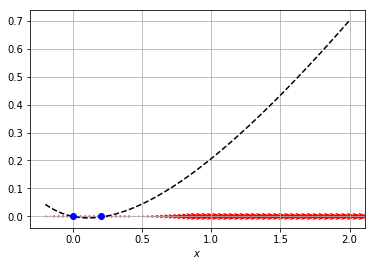

In [67]:
r = .9
xc1 = 0
xc2 = 2 - 2*r
xvals = np.linspace(-.2,2,70)
yvals = np.zeros(xvals.size)
xprime = r*xvals - np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,xprime,ls='--',color='k')
plt.plot(xc1,0,'bo',xc2,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

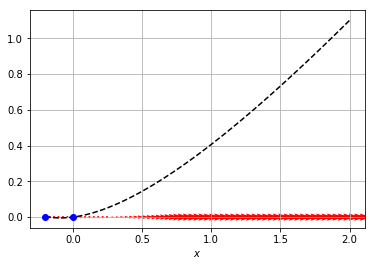

In [68]:
r = 1.1
xc1 = 0
xc2 = 2 - 2*r
xvals = np.linspace(-.2,2,70)
yvals = np.zeros(xvals.size)
xprime = r*xvals - np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,xprime,ls='--',color='k')
plt.plot(xc1,0,'bo',xc2,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

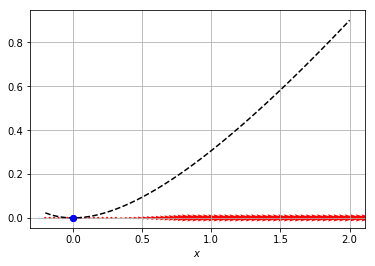

In [69]:
r = 1
xc1 = 0
xc2 = 2 - 2*r
xvals = np.linspace(-.2,2,70)
yvals = np.zeros(xvals.size)
xprime = r*xvals - np.log(1+xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,xprime,ls='--',color='k')
plt.plot(xc1,0,'bo',xc2,0,'bo')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$')
plt.grid()
plt.show()

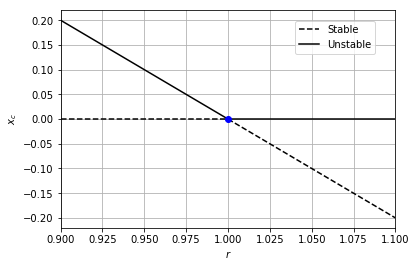

In [12]:
r = np.linspace(.9,1,100)
r2 = np.linspace(1,1.1,100)
x0 = np.zeros(100)
xc1 = 2-2*r
xc2 = 2-2*r2

plt.plot(r,x0,color = 'k', ls = '--',label = 'Stable')
plt.plot(r2,x0,color = 'k', ls = '-',label = 'Unstable')
plt.plot(r,xc1,'-k',r2,xc2,'--k',1,0,'bo')
plt.xlabel('$r$')
plt.ylabel('$x_{c}$')
plt.xlim(.9,1.1)
plt.legend(loc=(.7,.8))
plt.grid()
plt.show()

Problem 3) (5 pts) Consider the system 
$$
\dot{X} = RX-X^2+aX^{3}+\mathcal{O}(X^{4})
$$ 
where $R\neq 0$.  We want to find a new variable $x$ such that the system transforms into $\dot{x} = Rx - x^{2} + \mathcal{O}(x^{4})$.  

To do this let
$$
x = X + bX^{3} + \mathcal{O}(X^{4})
$$
where $b$ will be chosen later to eliminate the cubic term.  This is called a _ near-identity _ transformation.  To pull this off you need to

a) Show that the near-identity transformation can be inverted to yield

$$
X = x + cx^{3} + \mathcal{O}(x^{4})
$$

where the point is to find $c$ in terms of $b$.

b) Write $\dot{x} = \dot{X} + 3bX^{2}\dot{X} + \mathcal{O}(X^{4})$, and then use your expandsion for $X$ so that everything is in terms of $x$.  How do you choose $b$ so that ultimately you have no cubic term?

**Answer for Problem 3:**

**a)** To show that 

$$
X = x + cx^{3} + \mathcal{O}(x^{4})
$$

is the inverse of 

$$
x = X + bX^{3} + \mathcal{O}(X^{4})
$$

we test

$$
X = X + bX^{3} + c(X + bX^{3})^{3} + \mathcal{O}(X^{4}) \\
\Rightarrow X = X + bX^{3} + cX^{3} + \mathcal{O}(X^{4}) \\
\Rightarrow X = X + (b + c)X^{3} + \mathcal{O}(X^{4})
$$

which is true if we let $c = -b$. 

**b)** We use $\dot{x} = \dot{X} + 3bX^{2}\dot{X} + \mathcal{O}(X^{4})$ and the inverse of the near identity transformation to get:

$$
\dot{x} = (R(x + cx^{3})-(x + cx^{3})^{2}+a(x + cx^{3})^{3}) + 3b(x + cx^{3})^{2}(R(x + cx^{3})-(x + cx^{3})^2+a(x + cx^{3})^{3}) + \mathcal{O}(x^{4})
$$

we again throw away higher order terms to get 

$$
\dot{x} = Rx + Rcx^{3}-x^{2} + ax^{3} + 3bx^{3} + \mathcal{O}(x^{4}) \\
\Rightarrow \dot{x} = Rx -x^{2} + (cR+a+3bR)x^{3} + \mathcal{O}(x^{4}) \\
\Rightarrow \dot{x} = Rx -x^{2} + (a+2bR)x^{3} + \mathcal{O}(x^{4}) 
$$

and if we let $b = \frac{-a}{2R}$, we cancel the cubic term and are left with $\dot{x} = Rx -x^{2} + \mathcal{O}(x^{4})$.

Problem 4) (5pts) Now we generalize the method from above.  Suppose we have managed to eliminate a number of higher-order terms, so that the system has been transformed into 

$$
\dot{X} = RX - X^{2} + a_{n}X^{n} + \mathcal{O}(X^{n+1}), ~ n\geq 3.
$$

Use the near-identity transformation $x = X + b_{n}X^{n} + \mathcal{O}(X^{n+1})$ and the previous strategy to show that the system can be rewritten as 

$$
\dot{x} = Rx - x^{2} + \mathcal{O}(x^{n+1})
$$

for an appropriate choice of $b_{n}$.  This shows we can eliminate as many higher-order terms as we like.  

**Answer to Problem 4:**

From $x = X + b_{n}X^{n} + \mathcal{O}(X^{n+1})$ we get the inverse $X = x + c_{n}x^{n} + \mathcal{O}(x^{n+1})$ which can be tested the same way as in problem 3 or derived from taylor expansions and with the value $c_{n} = -b_{n}$. We then use the same form shown in problem 3 by taking the identity of the generalized near identity transformation:

$$
\dot{x} = \dot{X} + nb_{n}X^{n-1}\dot{X} + \mathcal{O}(X^{n+1})
$$

we then plug in our value for $\dot{X}$ and get 

$$
\dot{x} = (RX - X^{2} + a_{n}X^{n}) + nb_{n}X^{n-1}(RX - X^{2} + a_{n}X^{n}) + \mathcal{O}(X^{n+1})
$$

and then insert our value for $X$ while throwing away higher order terms:

$$
\dot{x} = (R(x + c_{n}x^{n}) - (x + c_{n}x^{n})^{2} + a_{n}(x + c_{n}x^{n})^{n}) + nb_{n}(x + c_{n}x^{n})^{n-1}(R(x + c_{n}x^{n}) - (x + c_{n}x^{n})^{2} + a_{n}(x + c_{n}x^{n})^{n}) + \mathcal{O}(x^{n+1}) \\
\Rightarrow \dot{x} = Rx + c_{n}Rx^{n} - x^{2} + a_{n}x^{n} + nb_{n}Rx^{n} + \mathcal{O}(x^{n+1}) \\
\Rightarrow \dot{x} = Rx - x^{2} + (c_{n}R + a_{n} + nb_{n}R)x^{n} + \mathcal{O}(x^{n+1}) \\
\Rightarrow \dot{x} = Rx - x^{2} + (a_{n} + (n-1)b_{n}R)x^{n} + \mathcal{O}(x^{n+1}) \\
$$

which if we let $b_{n} = \frac{-a_{n}}{(n-1)R}$, we cancel the $x^{n}$ term and get

$$
\dot{x} = Rx - x^{2} + \mathcal{O}(x^{n+1}).
$$